In [1]:
import util as u
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras


Loaded util


In [2]:
xs,ys = u.get_dataset()
X_train  = xs[:30]
Y_train = ys[:30]; Y_train = Y_train.reshape(30,4)/512
X_test = xs[30:39]
Y_test = ys[30:39]; Y_test = Y_test.reshape(9,4)/512

#set params
batch_size=2
num_epochs=10
model_name="v0_" + str(num_epochs) + "e_b" + str(batch_size)

In [3]:
np.max(X_train[0,:,:,:])

255.0

In [4]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(10, kernel_size=11, input_shape=(512, 512, 3)))
model.add(Activation('relu'))
model.add(Conv2D(10, kernel_size=11))
model.add(Activation('relu'))

#pool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(10, kernel_size=11))
model.add(Activation('relu'))
model.add(Conv2D(10, kernel_size=11))
model.add(Activation('relu'))

#pool 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(4, activation = None))


#model.add(Dense(4, activation = "sigmoid", kernel_initializer=keras.initializers.RandomNormal(mean=0,stddev=0.05)))

# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
#compile model using accuracy to measure model performance
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999), loss='mean_squared_error')

In [6]:
#model.summary()

In [7]:
h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=num_epochs)

Train on 30 samples, validate on 9 samples
Epoch 1/10
30/30 [==============================] - 11s 378ms/sample - loss: 10427.6383 - val_loss: 0.8630
Epoch 2/10
30/30 [==============================] - 2s 52ms/sample - loss: 0.8259 - val_loss: 0.1202
Epoch 3/10
30/30 [==============================] - 2s 54ms/sample - loss: 0.1706 - val_loss: 0.0990
Epoch 4/10
30/30 [==============================] - 2s 53ms/sample - loss: 0.0843 - val_loss: 0.0869
Epoch 5/10
30/30 [==============================] - 2s 53ms/sample - loss: 0.0572 - val_loss: 0.0814
Epoch 6/10
30/30 [==============================] - 2s 53ms/sample - loss: 0.0407 - val_loss: 0.0775
Epoch 7/10
30/30 [==============================] - 2s 51ms/sample - loss: 0.0320 - val_loss: 0.0743
Epoch 8/10
30/30 [==============================] - 2s 50ms/sample - loss: 0.0246 - val_loss: 0.0725
Epoch 9/10
30/30 [==============================] - 2s 50ms/sample - loss: 0.0196 - val_loss: 0.0713
Epoch 10/10
30/30 [=======================

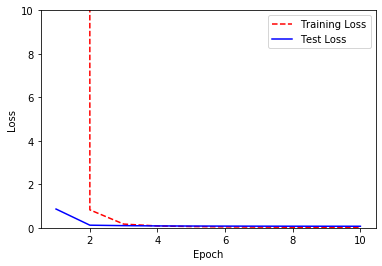

In [8]:
train_loss = h.history['loss']
test_loss  = h.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,10])
plt.show();


In [9]:
#plt.savefig("models/" + model_name + ".png")

In [10]:
def get_results(x,y) : 
    pred = model.predict(x)
    return (pred, y, y-pred , np.mean( (y-pred)**2) ) 
    

In [11]:
y_train_p, y_train, train_diff , train_loss = get_results(X_train,Y_train)

In [12]:
y_test_p, y_test, test_diff , test_loss = get_results(X_test,Y_test)

In [13]:
y_train_p

array([[ 0.37227377,  0.19616258,  0.44659606,  0.24450421],
       [ 0.29534888,  0.6946705 ,  0.08455301,  0.7229066 ],
       [ 0.3342072 ,  0.12830788,  0.38365582,  0.18103899],
       [ 0.3378733 ,  0.2285701 ,  0.20470513,  0.27445537],
       [ 0.5055049 ,  0.3362471 , -0.4183769 ,  0.41906467],
       [ 0.3240028 ,  0.5459966 ,  0.37339205,  0.57875603],
       [ 0.29730743,  0.54686236, -0.11027777,  0.59260476],
       [ 0.5721968 ,  0.44870603,  0.5149688 ,  0.50962603],
       [ 0.34065488,  0.21864973,  0.61299616,  0.20575641],
       [ 0.24717472,  0.61636496,  0.3153136 ,  0.63855916],
       [ 0.1298969 ,  0.5255286 ,  0.18621443,  0.5574848 ],
       [ 0.48802683,  0.32851875,  0.54546523,  0.36980337],
       [ 0.49052432,  0.36939877,  0.54209113,  0.41822594],
       [ 0.25349414,  0.3181438 ,  0.24035749,  0.47379845],
       [ 0.4978324 ,  0.4508758 ,  0.552162  ,  0.5003871 ],
       [ 0.4841067 ,  0.39932817,  0.53801733,  0.44032344],
       [ 0.46895093,  0.

In [14]:
y_train

array([[0.38085938, 0.20703125, 0.45117188, 0.25585938],
       [0.25976562, 0.68164062, 0.31054688, 0.71875   ],
       [0.328125  , 0.12304688, 0.38867188, 0.17773438],
       [0.33789062, 0.2265625 , 0.39257812, 0.27148438],
       [0.4765625 , 0.31445312, 0.53710938, 0.38867188],
       [0.3125    , 0.5234375 , 0.36328125, 0.56640625],
       [0.11328125, 0.54296875, 0.14453125, 0.57617188],
       [0.54296875, 0.36132812, 0.57617188, 0.39648438],
       [0.54882812, 0.47460938, 0.58398438, 0.50390625],
       [0.24804688, 0.65234375, 0.2890625 , 0.68554688],
       [0.13476562, 0.5234375 , 0.16601562, 0.55664062],
       [0.4921875 , 0.328125  , 0.5390625 , 0.37109375],
       [0.49023438, 0.37109375, 0.53320312, 0.41796875],
       [0.25195312, 0.31640625, 0.4140625 , 0.484375  ],
       [0.48828125, 0.4453125 , 0.53515625, 0.49414062],
       [0.48632812, 0.3984375 , 0.53320312, 0.43945312],
       [0.49023438, 0.41015625, 0.5390625 , 0.45898438],
       [0.49609375, 0.421875  ,

In [15]:
(y_train_p - y_train)#train_diff

array([[-8.58560205e-03, -1.08686686e-02, -4.57581878e-03,
        -1.13551617e-02],
       [ 3.55832577e-02,  1.30298734e-02, -2.25993864e-01,
         4.15658951e-03],
       [ 6.08220696e-03,  5.26100397e-03, -5.01605868e-03,
         3.30461562e-03],
       [-1.73151493e-05,  2.00760365e-03, -1.87872991e-01,
         2.97099352e-03],
       [ 2.89424062e-02,  2.17939615e-02, -9.55486268e-01,
         3.03927958e-02],
       [ 1.15028024e-02,  2.25591063e-02,  1.01107955e-02,
         1.23497844e-02],
       [ 1.84026182e-01,  3.89361382e-03, -2.54809022e-01,
         1.64328814e-02],
       [ 2.92280316e-02,  8.73779058e-02, -6.12030625e-02,
         1.13141656e-01],
       [-2.08173245e-01, -2.55959645e-01,  2.90117860e-02,
        -2.98149839e-01],
       [-8.72150064e-04, -3.59787941e-02,  2.62511075e-02,
        -4.69877124e-02],
       [-4.86873090e-03,  2.09110975e-03,  2.01988071e-02,
         8.44180584e-04],
       [-4.16067243e-03,  3.93748283e-04,  6.40273094e-03,
      

In [16]:
train_loss

0.013856165237598287

In [17]:
# serialize model to JSON
def save_model(model,name) : 
    model_json = model.to_json()
    model_name = "models/" + name
    with open(model_name + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(model_name + ".h5")
    print("Saved model to disk")

In [18]:
#save_model(model,model_name)